In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
country = "Chile"
year = 2021
location_level = "commune"

In [3]:
regions = {
    "DE ARICA Y PARINACOTA": "Región de Arica y Parinacota",
    "DE TARAPACA": "Región de Tarapacá",
    "DE ANTOFAGASTA": "Región de Antofagasta",
    "DE ATACAMA": "Región de Atacama",
    "DE COQUIMBO": "Región de Coquimbo",
    "DE VALPARAISO": "Región de Valparaíso",
    "METROPOLITANA DE SANTIAGO": "Región Metropolitana de Santiago",
    "DEL LIBERTADOR GENERAL BERNARDO O'HIGGINS": "Región del Libertador Bernardo O'Higgins",
    "DEL MAULE": "Región del Maule",
    "DE ÑUBLE": "Región de Ñuble",
    "DEL BIOBIO": "Región del Bío-Bío",
    "DE LA ARAUCANIA": "Región de La Araucanía",
    "DE LOS RIOS": "Región de Los Ríos",
    "DE LOS LAGOS": "Región de Los Lagos",
    "DE AYSEN DEL GENERAL CARLOS IBAÑEZ DEL CAMPO": "Región de Aysén del Gral.Ibañez del Campo",
    "DE MAGALLANES Y DE LA ANTARTICA CHILENA": "Región de Magallanes y Antártica Chilena"
}

In [10]:
gdf = gpd.read_file("https://raw.githubusercontent.com/fcortes/Chile-GeoJSON/master/comunas.geojson")
gdf.head()
gdf["Comuna"] = gdf["Comuna"].str.upper().str.normalize("NFKD").str.encode("ascii", errors="ignore").str.decode("utf-8")
gdf = gdf.rename(columns={"Comuna": "commune"})

In [11]:
df = pd.read_csv(f"data_output/{country}/{year}_divisiveness_{location_level}.csv.gzip", compression="gzip")
df.head()

,alternative,value,rank,commune
0,JOSE ANTONIO KAST RIST,1.000000,1,ALGARROBO
1,GABRIEL BORIC FONT,0.558824,2,ALGARROBO
2,SEBASTIAN SICHEL RAMIREZ,0.004335,3,ALGARROBO
3,FRANCO PARISI FERNANDEZ,0.000000,4,ALGARROBO
4,MARCO ENRIQUEZ-OMINAMI GUMUCIO,0.000000,4,ALGARROBO


In [12]:
data = pd.merge(gdf, df, on=location_level)
data.head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,commune,Provincia,geometry,alternative,value,rank
0,48,170038.6241,16,8,6204,6,9.685774e+08,206184.2716,Región del Libertador Bernardo O'Higgins,MARCHIGUE,Cardenal Caro,"POLYGON ((-71.80070 -34.20720, -71.72950 -34.3...",GABRIEL BORIC FONT,0.553269,1
1,48,170038.6241,16,8,6204,6,9.685774e+08,206184.2716,Región del Libertador Bernardo O'Higgins,MARCHIGUE,Cardenal Caro,"POLYGON ((-71.80070 -34.20720, -71.72950 -34.3...",JOSE ANTONIO KAST RIST,0.522892,2
2,48,170038.6241,16,8,6204,6,9.685774e+08,206184.2716,Región del Libertador Bernardo O'Higgins,MARCHIGUE,Cardenal Caro,"POLYGON ((-71.80070 -34.20720, -71.72950 -34.3...",SEBASTIAN SICHEL RAMIREZ,0.461900,3
3,48,170038.6241,16,8,6204,6,9.685774e+08,206184.2716,Región del Libertador Bernardo O'Higgins,MARCHIGUE,Cardenal Caro,"POLYGON ((-71.80070 -34.20720, -71.72950 -34.3...",YASNA PROVOSTE CAMPILLAY,0.316231,4
4,48,170038.6241,16,8,6204,6,9.685774e+08,206184.2716,Región del Libertador Bernardo O'Higgins,MARCHIGUE,Cardenal Caro,"POLYGON ((-71.80070 -34.20720, -71.72950 -34.3...",FRANCO PARISI FERNANDEZ,0.001280,5


<AxesSubplot:>

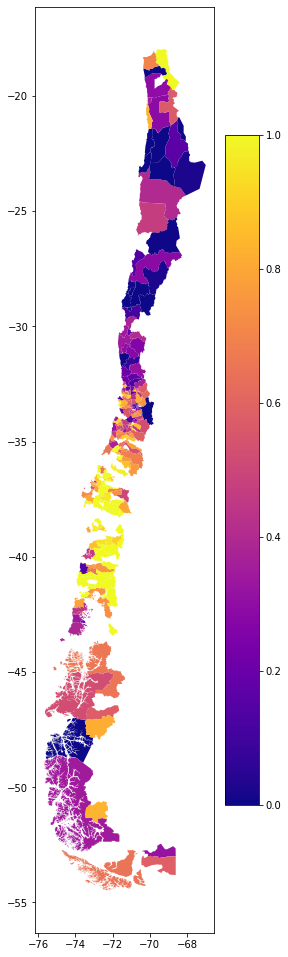

In [18]:
fig, ax = plt.subplots(figsize=(4, 20))

data_tmp = data[data["alternative"] == "JOSE ANTONIO KAST RIST"]
data_tmp = data_tmp[~data_tmp["commune"].isin(["ISLA DE PASCUA", "JUAN FERNANDEZ"])]
data_tmp.plot(column="value", cmap="plasma", ax=ax, legend=True)